# DST PREDICTION 

# IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as  pd 
import matplotlib.pyplot
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# LOAD DATA

In [2]:
df = pd.read_csv('/kaggle/input/dst-dataset/data.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,period,timedelta,dst,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-7,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 01:00:00,-10,-6.56,0.27,1.35,11.21,178.22,-6.56,0.27,1.35,11.21,178.22,7.01,0.36,317.16,NaN,ac
2,train_a,0 days 02:00:00,-10,-7.22,0.82,2.02,15.01,174.17,-7.22,0.82,2.02,15.01,174.17,7.84,1.27,336.55,44423.0,ac
3,train_a,0 days 03:00:00,-6,-6.83,1.33,3.32,24.42,170.00,-6.83,1.33,3.32,24.42,170.00,8.02,0.77,352.57,45112.0,ac
4,train_a,0 days 04:00:00,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['period', 'timedelta', 'dst', 'bx_gse', 'by_gse', 'bz_gse', 'theta_gse',
       'phi_gse', 'bx_gsm', 'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'bt',
       'density', 'speed', 'temperature', 'source'],
      dtype='object')

# DATASET ANALYSIS

In [4]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139872 entries, 0 to 139871
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   period       139872 non-null  object 
 1   timedelta    139872 non-null  object 
 2   dst          139872 non-null  int64  
 3   bx_gse       134128 non-null  float64
 4   by_gse       134128 non-null  float64
 5   bz_gse       134128 non-null  float64
 6   theta_gse    134128 non-null  float64
 7   phi_gse      134119 non-null  float64
 8   bx_gsm       134128 non-null  float64
 9   by_gsm       134128 non-null  float64
 10  bz_gsm       134128 non-null  float64
 11  theta_gsm    134128 non-null  float64
 12  phi_gsm      134119 non-null  float64
 13  bt           134128 non-null  float64
 14  density      128035 non-null  float64
 15  speed        127946 non-null  float64
 16  temperature  125865 non-null  float64
 17  source       134409 non-null  object 
dtypes: float64(14), int64(1)

In [5]:
print(df.describe()) 

                 dst         bx_gse         by_gse         bz_gse  \
count  139872.000000  134128.000000  134128.000000  134128.000000   
mean      -11.055236      -0.653479       0.110439      -0.024452   
std        19.069327       3.669085       3.972190       3.352512   
min      -387.000000     -44.690000     -35.520000     -46.620000   
25%       -18.000000      -3.270000      -2.450000      -1.710000   
50%        -8.000000      -0.660000       0.100000       0.010000   
75%         0.000000       2.020000       2.640000       1.680000   
max        67.000000      29.980000      50.620000      49.620000   

           theta_gse        phi_gse         bx_gsm         by_gsm  \
count  134128.000000  134119.000000  134128.000000  134128.000000   
mean        0.103148     194.262941      -0.653318       0.088571   
std        32.130392      96.687705       3.666963       3.909007   
min       -89.600000       0.000000     -44.680000     -35.010000   
25%       -21.520000     123.9800

In [6]:
for i in df.columns : 
    print(i)

period
timedelta
dst
bx_gse
by_gse
bz_gse
theta_gse
phi_gse
bx_gsm
by_gsm
bz_gsm
theta_gsm
phi_gsm
bt
density
speed
temperature
source


**NULL VALUE**

In [7]:
print(df.period.isnull().sum())
print(df.timedelta.isnull().sum())
print(df.dst.isnull().sum())
print(df.bx_gse.isnull().sum())
print(df.by_gse.isnull().sum())
print(df.bz_gse.isnull().sum())
print(df.theta_gse.isnull().sum())
print(df.phi_gse.isnull().sum())
print(df.bx_gsm.isnull().sum())
print(df.by_gsm.isnull().sum())
print(df.bz_gsm.isnull().sum())
print(df.theta_gsm.isnull().sum())
print(df.phi_gsm.isnull().sum())
print(df.bt.isnull().sum())
print(df.density.isnull().sum())
print(df.speed.isnull().sum())
print(df.temperature.isnull().sum())
print(df.source.isnull().sum())

0
0
0
5744
5744
5744
5744
5753
5744
5744
5744
5744
5753
5744
11837
11926
14007
5463


**INTERPOLATION METHOD**

In [8]:
df.isnull().sum()

period             0
timedelta          0
dst                0
bx_gse          5744
by_gse          5744
bz_gse          5744
theta_gse       5744
phi_gse         5753
bx_gsm          5744
by_gsm          5744
bz_gsm          5744
theta_gsm       5744
phi_gsm         5753
bt              5744
density        11837
speed          11926
temperature    14007
source          5463
dtype: int64

In [9]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,period,timedelta,dst,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-7,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 01:00:00,-10,-6.56,0.27,1.35,11.21,178.22,-6.56,0.27,1.35,11.21,178.22,7.01,0.36,317.16,NaN,ac
2,train_a,0 days 02:00:00,-10,-7.22,0.82,2.02,15.01,174.17,-7.22,0.82,2.02,15.01,174.17,7.84,1.27,336.55,44423.0,ac
3,train_a,0 days 03:00:00,-6,-6.83,1.33,3.32,24.42,170.00,-6.83,1.33,3.32,24.42,170.00,8.02,0.77,352.57,45112.0,ac
4,train_a,0 days 04:00:00,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop(['source','period'],axis =1)

In [11]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timedelta,dst,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature
0,0 days 00:00:00,-7,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0
1,0 days 01:00:00,-10,-6.56,0.27,1.35,11.21,178.22,-6.56,0.27,1.35,11.21,178.22,7.01,0.36,317.16,NaN
2,0 days 02:00:00,-10,-7.22,0.82,2.02,15.01,174.17,-7.22,0.82,2.02,15.01,174.17,7.84,1.27,336.55,44423.0
3,0 days 03:00:00,-6,-6.83,1.33,3.32,24.42,170.00,-6.83,1.33,3.32,24.42,170.00,8.02,0.77,352.57,45112.0
4,0 days 04:00:00,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# # Convert 'timedelta' column to total seconds
# df['timedelta'] = pd.to_timedelta(df['timedelta'])

In [13]:
# df['timedelta'] = pd.to_timedelta(df['timedelta'])
# start_date = pd.Timestamp('2025-01-01')
# df['timestamp'] = start_date + df['timedelta']

# df = df.set_index('timestamp')
# df = df.sort_index()  # Sorting is important for time interpolation
# df = df.interpolate(method='time')


In [14]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,timedelta,dst,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature
0,0 days 00:00:00,-7,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0
1,0 days 01:00:00,-10,-6.56,0.27,1.35,11.21,178.22,-6.56,0.27,1.35,11.21,178.22,7.01,0.36,317.16,NaN
2,0 days 02:00:00,-10,-7.22,0.82,2.02,15.01,174.17,-7.22,0.82,2.02,15.01,174.17,7.84,1.27,336.55,44423.0
3,0 days 03:00:00,-6,-6.83,1.33,3.32,24.42,170.00,-6.83,1.33,3.32,24.42,170.00,8.02,0.77,352.57,45112.0
4,0 days 04:00:00,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df.drop('timedelta',axis=1)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,dst,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature
0,-7,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0
1,-10,-6.56,0.27,1.35,11.21,178.22,-6.56,0.27,1.35,11.21,178.22,7.01,0.36,317.16,NaN
2,-10,-7.22,0.82,2.02,15.01,174.17,-7.22,0.82,2.02,15.01,174.17,7.84,1.27,336.55,44423.0
3,-6,-6.83,1.33,3.32,24.42,170.00,-6.83,1.33,3.32,24.42,170.00,8.02,0.77,352.57,45112.0
4,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df.interpolate(method='linear')

In [17]:
df.isnull().sum()

dst            0
bx_gse         0
by_gse         0
bz_gse         0
theta_gse      0
phi_gse        0
bx_gsm         0
by_gsm         0
bz_gsm         0
theta_gsm      0
phi_gsm        0
bt             0
density        0
speed          0
temperature    0
dtype: int64

# VISUALIZATION

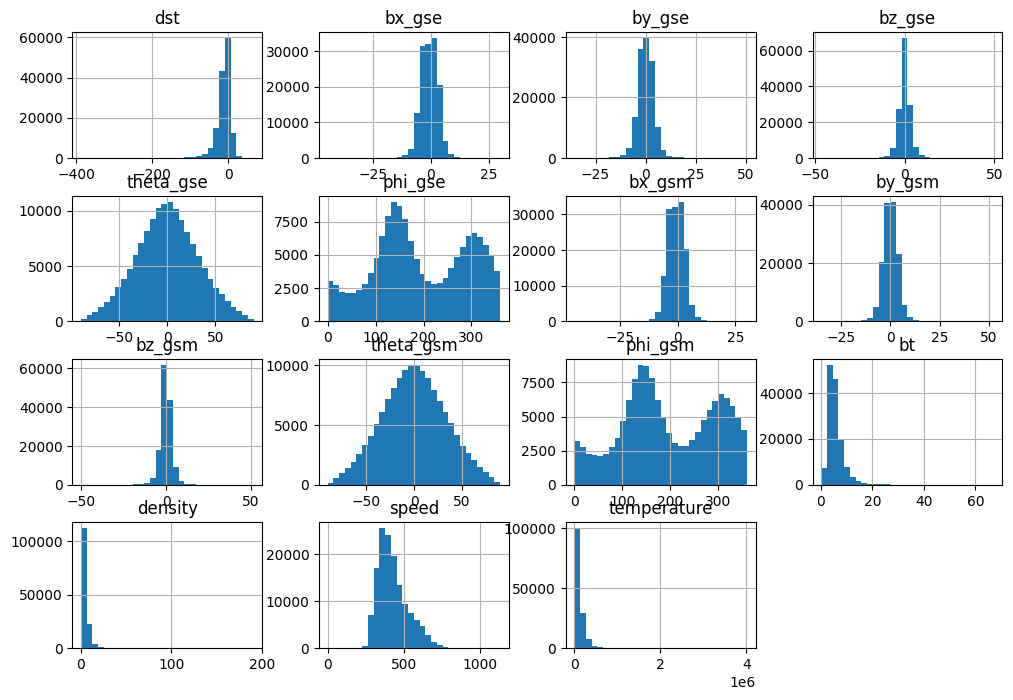

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8), bins=30)
plt.show()


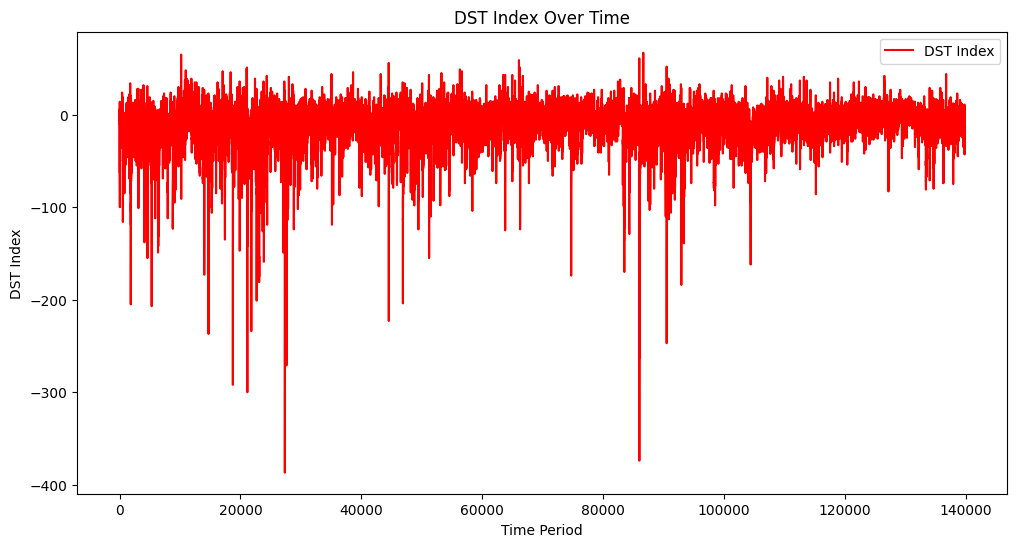

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['dst'], label="DST Index", color="red")
plt.xlabel("Time Period")
plt.ylabel("DST Index")
plt.title("DST Index Over Time")
plt.legend()
plt.show()

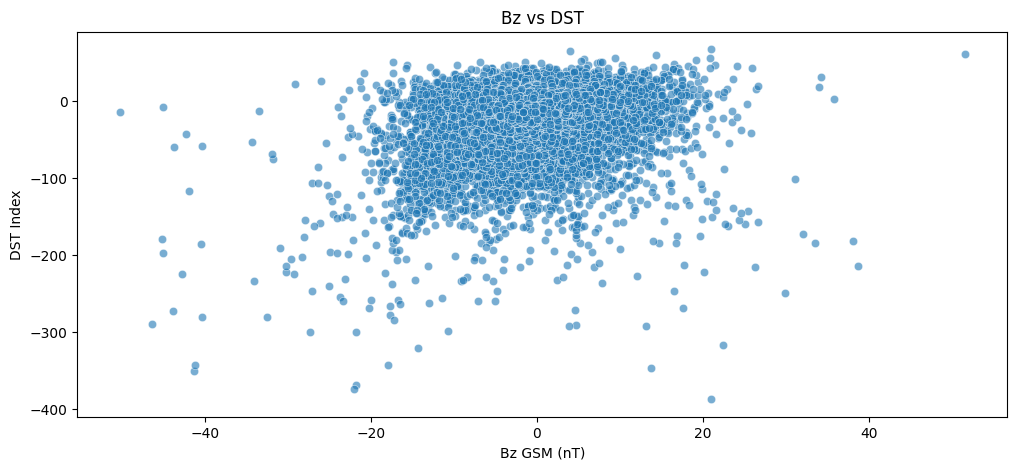

In [20]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["bz_gsm"], y=df["dst"], alpha=0.6)
plt.xlabel("Bz GSM (nT)")
plt.ylabel("DST Index")
plt.title("Bz vs DST")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

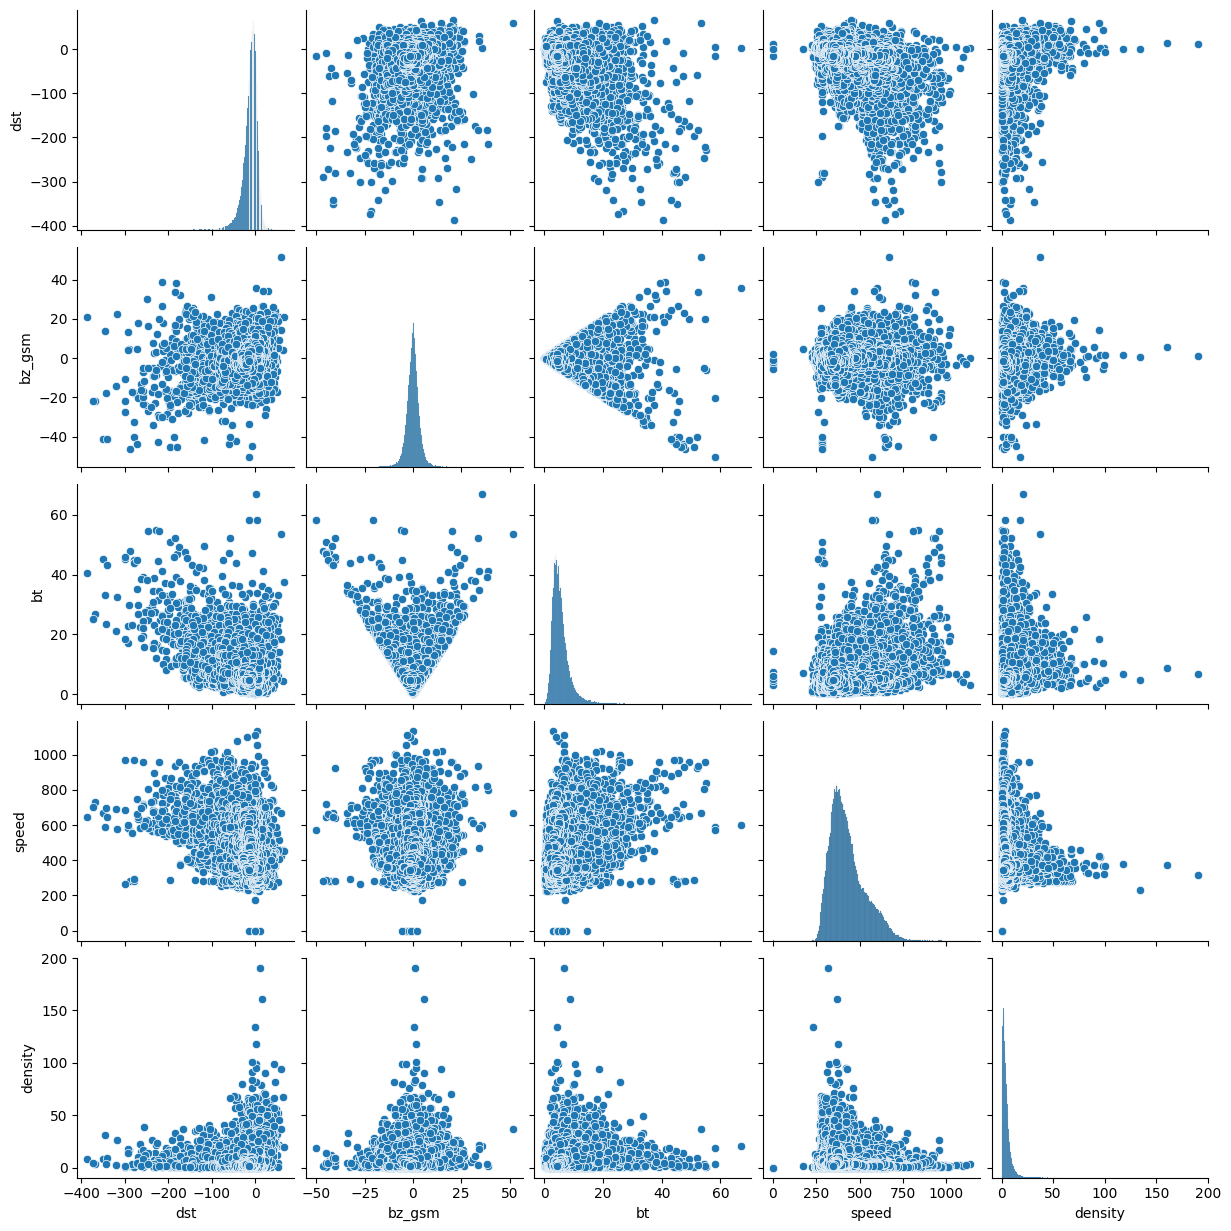

In [21]:
sns.pairplot(df[['dst', 'bz_gsm', 'bt', 'speed', 'density']])
plt.show()


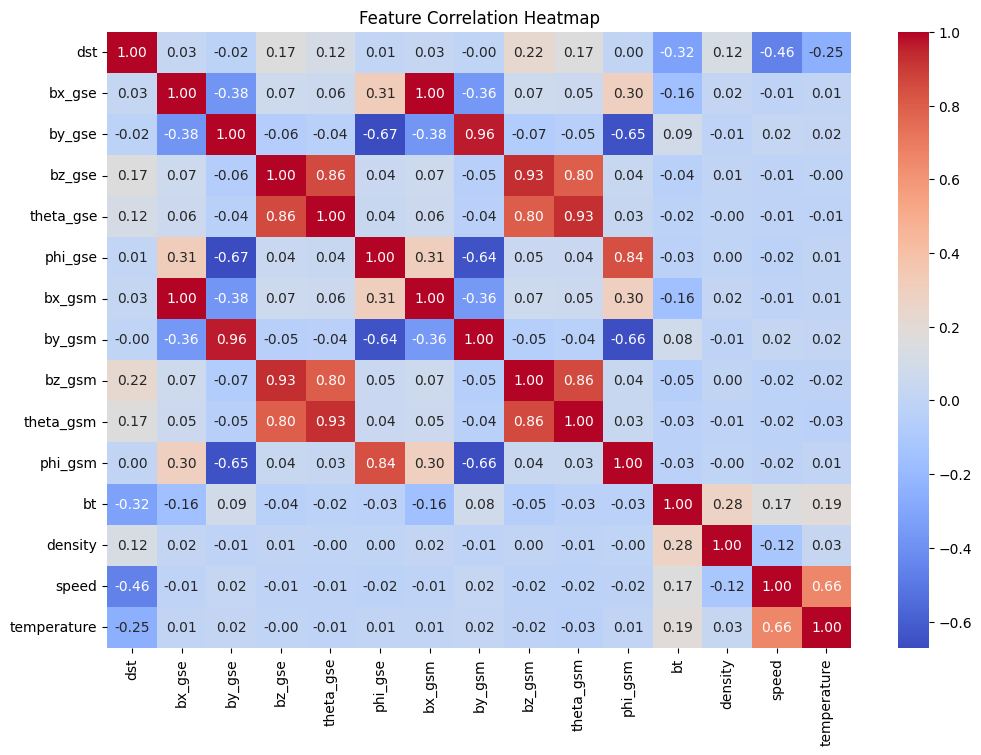

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# SPLITING DATASET TO DEPENDENT AND INDEPENDENT VARIABLES

In [23]:
# Load and preprocess data
X = df.drop(['dst'], axis=1)
y = df['dst']

In [24]:
X.head()

,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature
0,-5.550,3.000,1.250,11.09,153.370,-5.550,3.000,1.250,11.09,153.370,6.800,1.53,383.92,110237.0
1,-6.560,0.270,1.350,11.21,178.220,-6.560,0.270,1.350,11.21,178.220,7.010,0.36,317.16,77330.0
2,-7.220,0.820,2.020,15.01,174.170,-7.220,0.820,2.020,15.01,174.170,7.840,1.27,336.55,44423.0
3,-6.830,1.330,3.320,24.42,170.000,-6.830,1.330,3.320,24.42,170.000,8.020,0.77,352.57,45112.0
4,-6.325,0.385,2.495,19.66,177.835,-6.325,0.385,2.495,19.66,177.835,7.225,2.72,363.82,77218.0


In [25]:
y.head()

0    -7
1   -10
2   -10
3    -6
4    -2
Name: dst, dtype: int64

# FEATURE SCALING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale X (features)
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Scale y (target) - after converting to array
scaler_y = StandardScaler()

y_train = y_train.values.reshape(-1, 1)  # Fix for Series
y_test = y_test.values.reshape(-1, 1)    # Fix for Series

y_train = scaler_y.fit_transform(y_train).ravel()  # ravel() flattens back to 1D after scaling
y_test = scaler_y.transform(y_test).ravel()        # same for test set


In [27]:
X_train

array([[-1.13704253,  1.36646731, -0.40932807, ..., -0.4702661 ,
        -0.07395641, -0.26320501],
       [-0.59324774, -1.44556285,  1.31469616, ...,  0.82131136,
        -0.05268277, -0.00374363],
       [ 1.71036537, -1.26666129,  0.54547007, ...,  0.58090825,
        -0.43450965, -0.22881847],
       ...,
       [ 1.50268495,  0.45684107,  0.16534667, ...,  0.02703836,
        -0.81973233, -0.11934309],
       [ 0.75394237, -0.24364673,  0.76995239, ..., -0.22043543,
         0.26332567, -0.2899677 ],
       [-0.14509525, -0.86854232,  0.40778758, ..., -0.72598901,
        -0.99980919, -0.64321095]])

In [28]:
X_test

array([[-0.18335217,  1.61088212,  0.74600761, ..., -0.33828009,
        -0.5768333 , -0.51780045],
       [-2.64545823,  0.85747977,  0.69811805, ...,  1.13242126,
        -0.23935147,  0.99849886],
       [ 0.23200868, -0.75263427, -0.03818396, ..., -0.45376785,
        -1.24920018, -0.80015843],
       ...,
       [ 0.59818206,  1.01118393,  0.02766418, ...,  0.10481583,
        -0.21128624, -0.60580402],
       [-0.95668848,  1.91325095, -0.64578278, ...,  0.52198592,
        -0.14486854,  0.08116873],
       [-0.83098717,  0.0839195 ,  0.40479448, ...,  0.93915602,
         0.40245328,  1.41935289]])

In [29]:
y_train

array([ 0.42293858,  0.47529102,  0.26588126, ..., -0.04823338,
        0.0564715 ,  0.68470078])

In [30]:
y_test

array([0.99881542, 0.78940566, 0.73705322, ..., 0.52764346, 0.73705322,
       0.26588126])

In [31]:
# Reshape input for BiLSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
X_train

array([[[-1.13704253],
        [ 1.36646731],
        [-0.40932807],
        ...,
        [-0.4702661 ],
        [-0.07395641],
        [-0.26320501]],

       [[-0.59324774],
        [-1.44556285],
        [ 1.31469616],
        ...,
        [ 0.82131136],
        [-0.05268277],
        [-0.00374363]],

       [[ 1.71036537],
        [-1.26666129],
        [ 0.54547007],
        ...,
        [ 0.58090825],
        [-0.43450965],
        [-0.22881847]],

       ...,

       [[ 1.50268495],
        [ 0.45684107],
        [ 0.16534667],
        ...,
        [ 0.02703836],
        [-0.81973233],
        [-0.11934309]],

       [[ 0.75394237],
        [-0.24364673],
        [ 0.76995239],
        ...,
        [-0.22043543],
        [ 0.26332567],
        [-0.2899677 ]],

       [[-0.14509525],
        [-0.86854232],
        [ 0.40778758],
        ...,
        [-0.72598901],
        [-0.99980919],
        [-0.64321095]]])

# ARCHITECTURE

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Bi-Directional LSTM Model
def build_bilstm_model(input_dim, output_dim):
    inputs = keras.Input(shape=(input_dim, 1))  # (time_steps, features)
    
    x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(inputs)
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(16))(x)  # No return_sequences for last LSTM
    
    outputs = layers.Dense(output_dim)(x)
    
    model = keras.Model(inputs, outputs)
    return model

# Ensure training data is 3D (samples, time_steps, features)
print("Original shape:", X_train.shape)  # Debugging line

if X_train.ndim == 2:
    X_train = np.expand_dims(X_train, axis=-1)
elif X_train.ndim == 4 or X_train.ndim == 5:
    X_train = np.squeeze(X_train)

if X_test.ndim == 2:
    X_test = np.expand_dims(X_test, axis=-1)
elif X_test.ndim == 4 or X_test.ndim == 5:
    X_test = np.squeeze(X_test)

print("Fixed shape:", X_train.shape)  # Debugging line

Original shape: (111897, 14, 1)
Fixed shape: (111897, 14, 1)


In [ ]:
# Define input/output dimensions
input_dim = X_train.shape[1]  # Number of time steps
output_dim = 1

# Build and compile the model
model = build_bilstm_model(input_dim, output_dim)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mape'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predictions
y_pred = model.predict(X_test)


Epoch 1/25
3497/3497 ━━━━━━━━━━━━━━━━━━━━ 88s 22ms/step - loss: 0.7778 - mae: 0.5721 - mape: 310.0086 - mse: 0.7778 - val_loss: 0.6364 - val_mae: 0.5217 - val_mape: 266.0796 - val_mse: 0.6364
Epoch 2/25
3497/3497 ━━━━━━━━━━━━━━━━━━━━ 78s 22ms/step - loss: 0.6342 - mae: 0.5230 - mape: 318.2569 - mse: 0.6342 - val_loss: 0.6264 - val_mae: 0.5134 - val_mape: 289.0409 - val_mse: 0.6264
Epoch 3/25
3497/3497 ━━━━━━━━━━━━━━━━━━━━ 78s 22ms/step - loss: 0.6078 - mae: 0.5159 - mape: 317.8781 - mse: 0.6078 - val_loss: 0.6225 - val_mae: 0.5167 - val_mape: 360.2856 - val_mse: 0.6225
Epoch 4/25
3497/3497 ━━━━━━━━━━━━━━━━━━━━ 78s 22ms/step - loss: 0.6117 - mae: 0.5113 - mape: 311.0111 - mse: 0.6117 - val_loss: 0.6022 - val_mae: 0.5154 - val_mape: 306.3849 - val_mse: 0.6022
Epoch 5/25
3497/3497 ━━━━━━━━━━━━━━━━━━━━ 78s 22ms/step - loss: 0.5924 - mae: 0.5098 - mape: 304.3119 - mse: 0.5924 - val_loss: 0.5917 - val_mae: 0.5039 - val_mape: 330.7434 - val_mse: 0.5917
Epoch 6/25
3497/3497 ━━━━━━━━━━━━━━━━━━━

# EVALUATION 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print resultscch
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R² Score: {r2:.4f}")